# 📊 Feature Selection for "The Top 10 Individual Performances in FIFA World Cup History" Analysis 🏆

## Introduction
In this notebook, we will explore the process of feature selection to identify the most relevant characteristics for evaluating player performance in the FIFA World Cup. By carefully selecting the right features, we aim to build a robust model that captures the essence of player contributions to their teams' success in the tournament.


## Feature Selection Process<a id="feature-selection"></a>
We will embark on a systematic journey of feature selection, wherein we'll explore different techniques to identify and retain the most informative features while discarding redundant or less significant ones. By the end of this process, we aim to create a refined dataset that encapsulates the essence of player performance in the World Cup.

**Created by: Jose Ruben Garcia Garcia**

*Date: April 2024*

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('FWC_stats.csv')
df.tail()

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team,year
40,3,1,0,41,57.75,0,0.00,19,67.86,12,...,10.00,1,0,NaN,0,0,0,Rivellino,Brazil,1970
41,7,0,0,78,60.94,1,50.00,47,67.14,5,...,58.33,0,3,NaN,0,0,0,Jairzinho,Brazil,1970
42,4,0,0,11,32.35,8,61.54,5,50.00,3,...,23.53,0,4,NaN,0,0,0,Geoff Hurst,England,1966
43,3,0,0,36,52.17,3,60.00,12,48.00,18,...,10.00,1,2,NaN,0,0,0,Bobby Charlton,England,1966
44,1,1,0,30,53.57,8,88.89,5,45.45,23,...,3.03,0,2,NaN,0,0,0,Martin Peters,England,1966


In [4]:
df.columns

Index(['goals', 'yellowCards', 'redCards', 'groundDuelsWon',
       'groundDuelsWonPercentage', 'aerialDuelsWon',
       'aerialDuelsWonPercentage', 'successfulDribbles',
       'successfulDribblesPercentage', 'tackles', 'assists',
       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',
       'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances',
       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',
       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',
       'accurateCrossesPercentage', 'accurateLongBalls',
       'accurateLongBallsPercentage', 'interceptions', 'clearances',
       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',
       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',
       'expectedGoals


## Data Preprocessing
- The dataset has undergone preprocessing to remove goalkeeper-specific variables, as well as any incomplete or redundant data points. 
- Missing values and outliers have been addressed to ensure data quality and reliability.


In [5]:
# List of goalkeeper-specific variables
goalkeeper_variables = ['saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
                        'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
                        'punches', 'runsOut','successfulRunsOut', 'errorLeadToGoal']

# Drop the goalkeeper-specific variables from the DataFrame
df = df.drop(goalkeeper_variables, axis=1)

# Display the resulting DataFrame
df.head()

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,blockedShots,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToShot,passToAssist,player,team,year
0,7,1,0,40,45.98,4,36.36,15,55.56,5,...,3,21.88,0,3,6.62,0,0,Lionel Messi,Argentina,2022
1,1,0,0,23,58.97,0,0.00,13,61.90,3,...,2,16.67,0,5,0.64,0,0,Ángel Di María,Argentina,2022
2,1,1,0,31,55.36,9,75.00,3,60.00,22,...,2,12.50,1,0,0.32,0,0,Enzo Fernández,Argentina,2022
3,4,0,0,29,50.00,5,41.67,8,72.73,10,...,3,18.18,1,2,NaN,0,0,Antoine Griezmann,France,2018
4,4,2,0,52,59.09,2,28.57,32,60.38,6,...,0,50.00,0,1,NaN,0,0,Kylian Mbappé,France,2018


In [6]:
# Create a new column 'Player_Year' by concatenating 'Player' and 'Year' columns to get better information in the future charts
df['Player_Year'] = df['player'] + ' - ' + df['year'].astype(str)

# Display the updated DataFrame
df.head()

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToShot,passToAssist,player,team,year,Player_Year
0,7,1,0,40,45.98,4,36.36,15,55.56,5,...,21.88,0,3,6.62,0,0,Lionel Messi,Argentina,2022,Lionel Messi - 2022
1,1,0,0,23,58.97,0,0.00,13,61.90,3,...,16.67,0,5,0.64,0,0,Ángel Di María,Argentina,2022,Ángel Di María - 2022
2,1,1,0,31,55.36,9,75.00,3,60.00,22,...,12.50,1,0,0.32,0,0,Enzo Fernández,Argentina,2022,Enzo Fernández - 2022
3,4,0,0,29,50.00,5,41.67,8,72.73,10,...,18.18,1,2,NaN,0,0,Antoine Griezmann,France,2018,Antoine Griezmann - 2018
4,4,2,0,52,59.09,2,28.57,32,60.38,6,...,50.00,0,1,NaN,0,0,Kylian Mbappé,France,2018,Kylian Mbappé - 2018


As we know, participating in the World Cup implies being part of the winning squad; however, something else that must also be highlighted is that, to be considered relevant, a player should play at least half of the matches. Therefore, those players with good statistics but not enough to be included in the analysis will be removed to avoid biases

In [7]:
# Now df contains only the players who have played at least 330 minutes in the tournament
# Filter players with at least 330 minutes played
df = df[df['minutesPlayed'] >= 330]

# Display the number of players that meet the criteria
df.tail()

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToShot,passToAssist,player,team,year,Player_Year
39,4,0,0,45,42.86,2,40.00,13,52.00,12,...,12.90,2,6,NaN,0,0,Pelé,Brazil,1970,Pelé - 1970
40,3,1,0,41,57.75,0,0.00,19,67.86,12,...,10.00,1,0,NaN,0,0,Rivellino,Brazil,1970,Rivellino - 1970
41,7,0,0,78,60.94,1,50.00,47,67.14,5,...,58.33,0,3,NaN,0,0,Jairzinho,Brazil,1970,Jairzinho - 1970
43,3,0,0,36,52.17,3,60.00,12,48.00,18,...,10.00,1,2,NaN,0,0,Bobby Charlton,England,1966,Bobby Charlton - 1966
44,1,1,0,30,53.57,8,88.89,5,45.45,23,...,3.03,0,2,NaN,0,0,Martin Peters,England,1966,Martin Peters - 1966


### Feature Selection 

### Correlation 
Main idea is to reduce that features that I found redundant, let's see the examples

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 44
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goals                         41 non-null     int64  
 1   yellowCards                   41 non-null     int64  
 2   redCards                      41 non-null     int64  
 3   groundDuelsWon                41 non-null     int64  
 4   groundDuelsWonPercentage      41 non-null     float64
 5   aerialDuelsWon                41 non-null     int64  
 6   aerialDuelsWonPercentage      41 non-null     float64
 7   successfulDribbles            41 non-null     int64  
 8   successfulDribblesPercentage  41 non-null     float64
 9   tackles                       41 non-null     int64  
 10  assists                       41 non-null     int64  
 11  accuratePassesPercentage      41 non-null     float64
 12  totalDuelsWon                 41 non-null     int64  
 13  totalDuelsWo

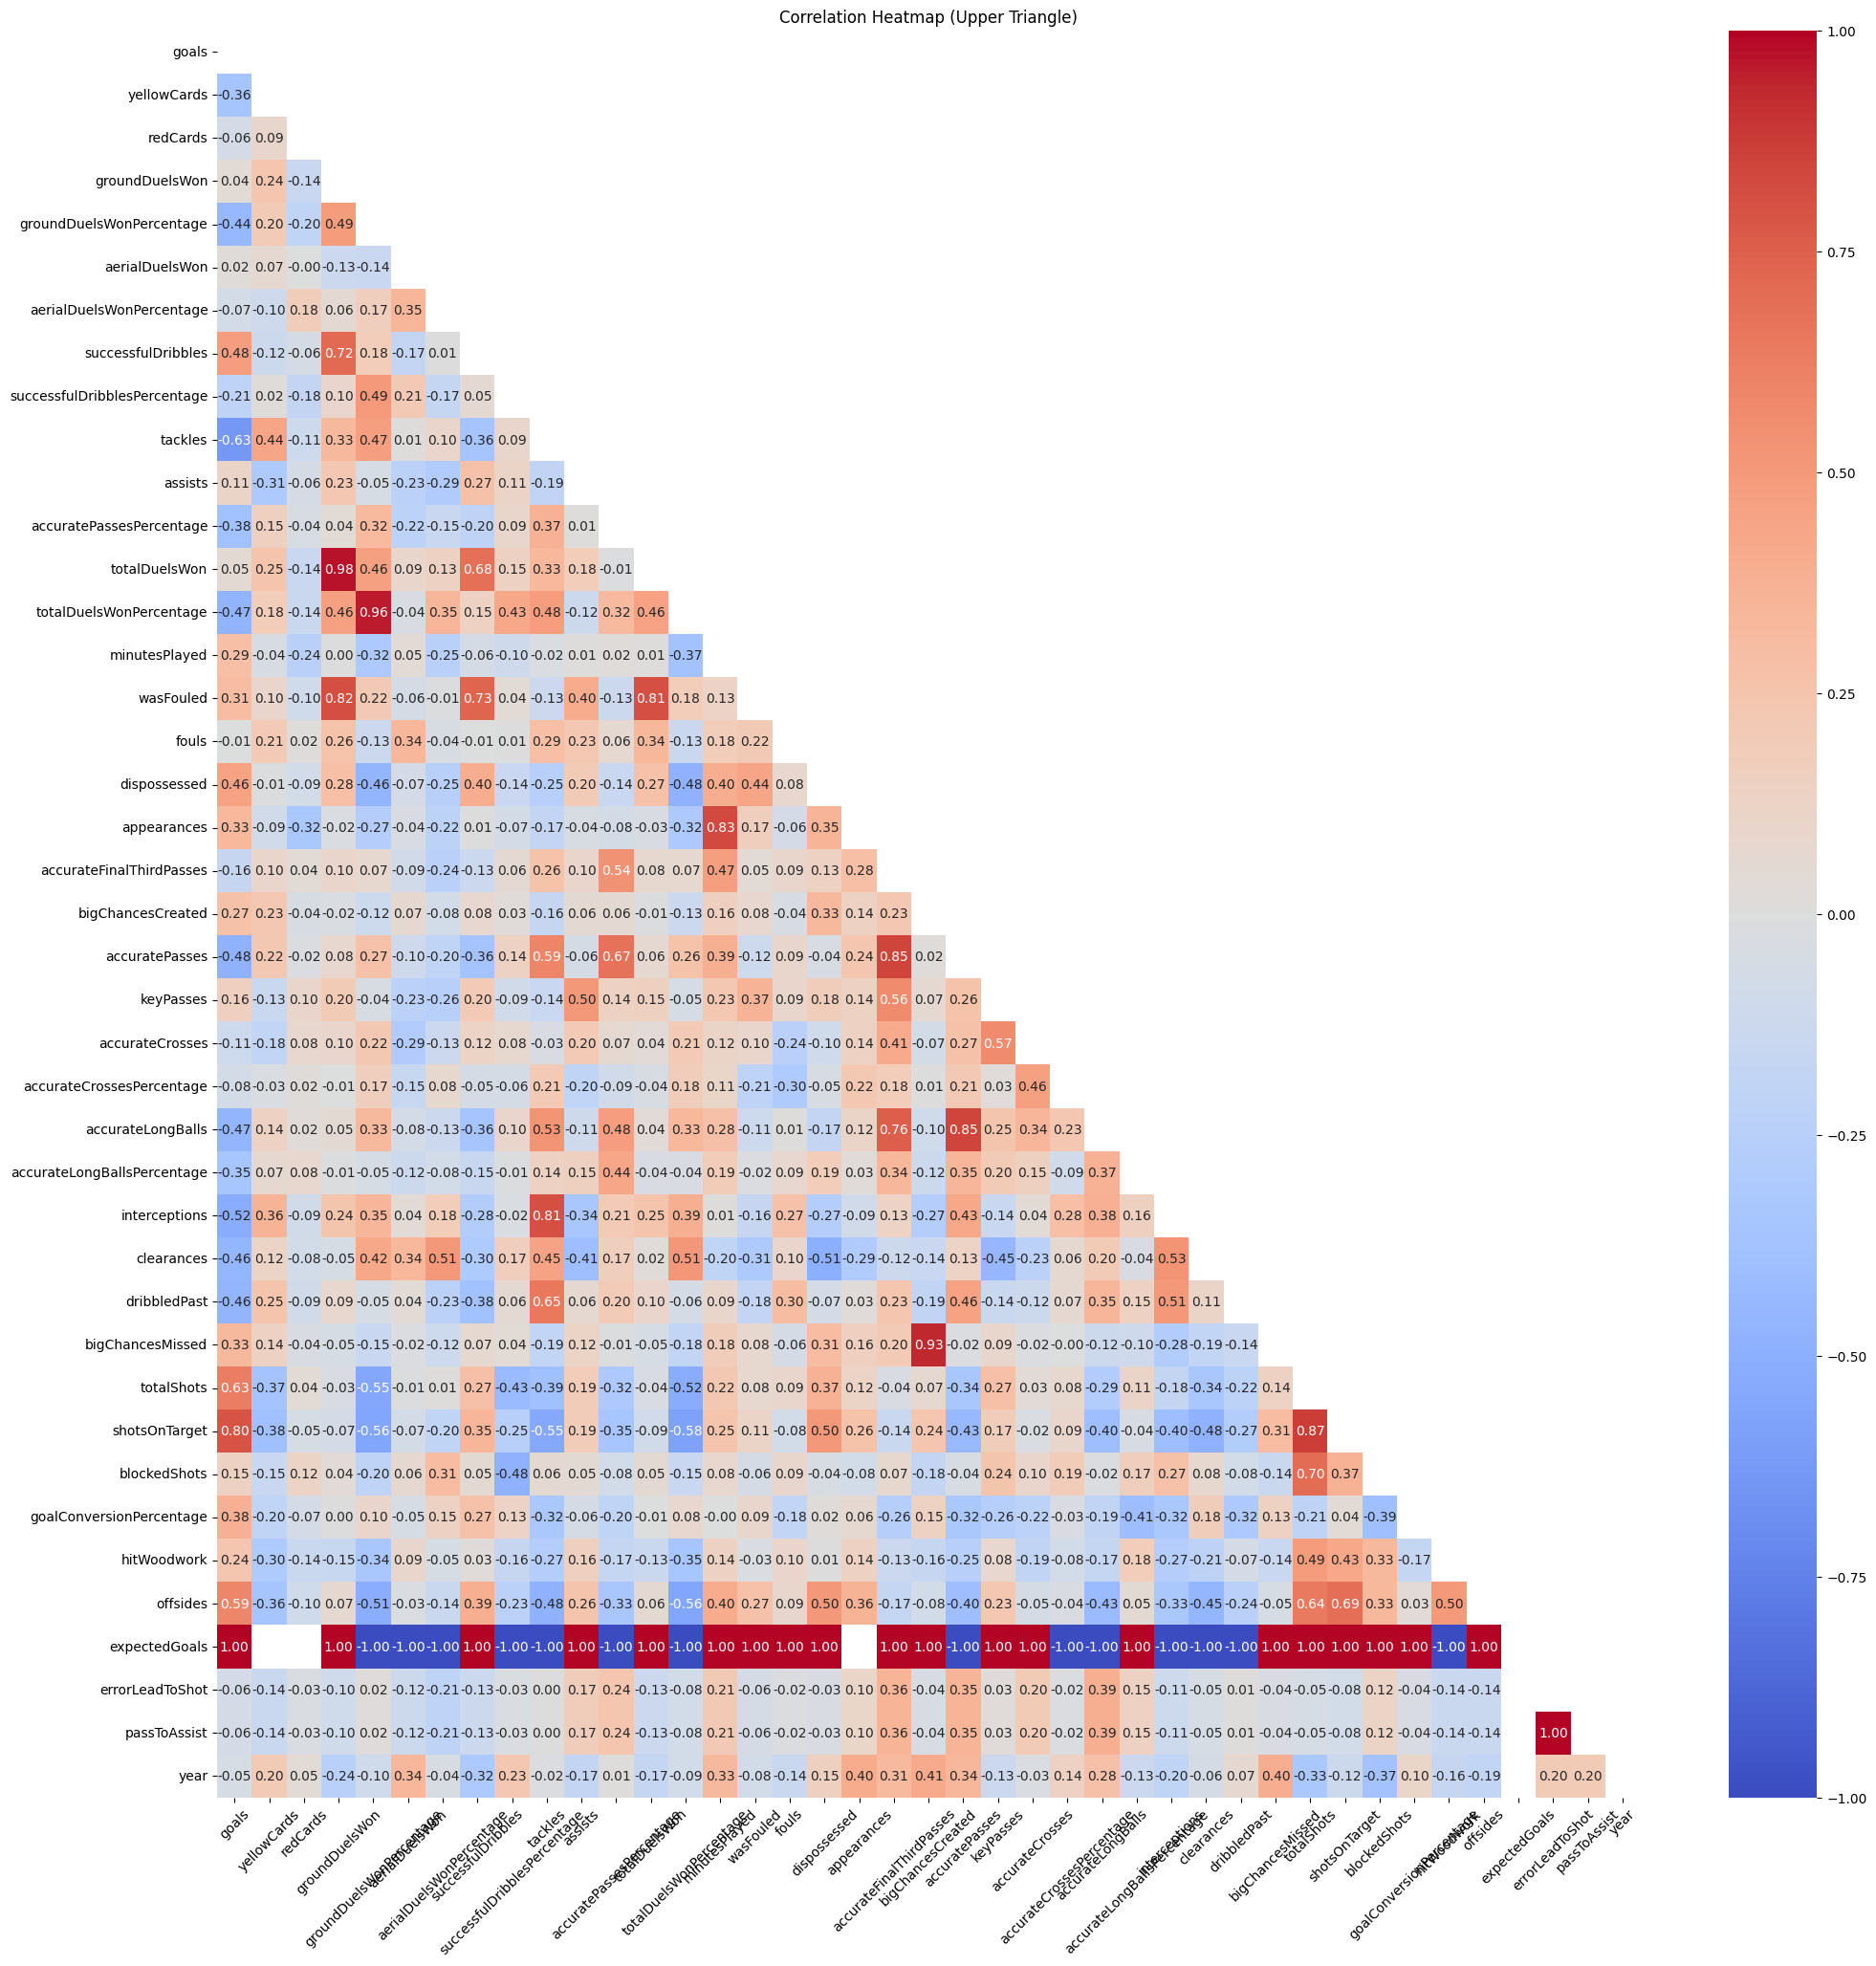

In [9]:
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask to hide the lower half of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap to visualize the correlation matrix (upper triangle)
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Upper Triangle)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visualization
plt.savefig('correlation_heatmap_upper_triangle.jpg', format='jpg')  # Save as JPG
plt.show()


### **Business Knowledge-Based Feature Selection  - Methodology**

1. **Business Knowledge-Based Grouping**: We'll group features based on their relevance to different aspects of the game, such as offensive performance, defensive capabilities, disciplinary records, etc. This grouping will help us identify potential redundancies and prioritize features for further analysis.

2. **Correlation Analysis**: We'll examine the correlation matrix of features to identify highly correlated pairs. High correlations indicate potential redundancies, as one feature may capture similar information as another.

3. **Feature Selection**: Based on the business knowledge-based grouping and correlation analysis, we'll select one representative feature from each group to retain, discarding redundant features.

#### Business Knowledge-Based Grouping

We'll organize features into the following groups with the features that will be used during the rest of the analysis:
After this steps groups and dataframe should look like this. 

- Goals + Assists (Definitions): goals, assists
- Duels: totalDuelsWon, totalDuelsWonPercentage
- Passes: accuratePasses, accuratePassesPercentage, keyPasses, 
- Dribbling: successfulDribbles, successfulDribblesPercentage, WasFouled
- Defense: tackles, interceptions, clearances
- Opportunities Creation: bigChancesCreated, passToAssist, accurateFinalThirdPasses
- Discipline: yellowCards, redCards, fouls
- Offensive Play: totalShots, shotsOnTarget, bigChancesMissed, goalConversionPercentage, hitWoodwork, offsides
- Participation: minutesPlayed
- Identification Information: player, team, year



## Subgroups of Features in the World Cup

After defining the metrics that will be used for the evaluation of the final ranking that will be created as the main objective of the analysis I will cover the following aspects to explain the creation of sub-clusters that we will help me to standardize the features in the dataset avoiding bias and the mix of not relevant stats, In addition I'm presenting few information about every subgroup to understand the metrics better in the analysis.

### Goals + Assists (Definitions)

This subgroup of characteristics focuses on a player's ability to score goals and provide assists to teammates. These statistics are fundamental for assessing a player's effectiveness in the offensive phase of the game and their ability to contribute to the scoreline.

### Duels

Duel statistics include the total number of duels won by a player as well as the percentage of duels won relative to total attempts. This provides insight into a player's ability to physically compete in one-on-one situations and their capacity to win possession of the ball.

### Passes

The passes subgroup focuses on accuracy and creativity in a player's passing game. It includes the number of accurate passes, percentage of successful passes completed, and the number of key passes leading to goal-scoring opportunities.

### Dribbling

These statistics assess a player's ability to successfully dribble past opponents and their capacity to create offensive opportunities. It includes the number of successful dribbles, percentage of successful dribbles, and the number of fouls drawn as a result of dribbling attempts.

### Defense

The defense subgroup highlights a player's contribution in the defensive phase of the game. It includes statistics such as the number of tackles made, interceptions, and clearances, which are key indicators of a player's ability to win back possession and prevent scoring opportunities for the opposing team.

### Opportunities Creation

These statistics focus on a player's ability to create goal-scoring opportunities for their team. It includes the number of chances created, passes leading to assists, and accurate passes in the final third of the field that generate goal-scoring chances.

### Discipline

The discipline subgroup evaluates a player's disciplinary behavior on the field. It includes the number of yellow and red cards received, as well as the number of fouls committed during the tournament.

### Offensive Play

This subgroup focuses on a player's involvement in the offensive phase of the game. It includes statistics such as the total number of shots, shots on target, missed big chances, goal conversion percentage, and other indicators of a player's effectiveness in attack.

### Participation

Participation statistics simply indicate the number of minutes a player spent on the field during the tournament. This is important to consider when evaluating their overall contribution to the team.


### **A New Dataset**

Before of be going to the next step that will be called DataProcessing I will create a new dataset with the elapsed features in the analysis to have a more readable dataset and to perform this the next command will be used. 

In [10]:
features = ['goals', 'assists', 'totalDuelsWon', 'totalDuelsWonPercentage',
                   'accuratePasses', 'accuratePassesPercentage', 'keyPasses',
                   'successfulDribbles', 'successfulDribblesPercentage', 'wasFouled',
                   'tackles', 'interceptions', 'clearances', 'bigChancesCreated',
                   'passToAssist', 'accurateFinalThirdPasses', 'yellowCards',
                   'redCards', 'fouls', 'totalShots', 'shotsOnTarget',
                   'bigChancesMissed', 'goalConversionPercentage', 'hitWoodwork',
                   'offsides', 'minutesPlayed', 'player', 'team', 'year']

# Create the new DataFrame with the feature that will be used as columns
new_df = df[features]

# Save the new DataFrame as a CSV file
new_df.to_csv("FWC_stats2.csv", index=False)
new_df.head()

,goals,assists,totalDuelsWon,totalDuelsWonPercentage,accuratePasses,accuratePassesPercentage,keyPasses,successfulDribbles,successfulDribblesPercentage,wasFouled,...,totalShots,shotsOnTarget,bigChancesMissed,goalConversionPercentage,hitWoodwork,offsides,minutesPlayed,player,team,year
0,7,3,44,44.90,295,85.01,21,15,55.56,22,...,32,18,3,21.88,0,3,690,Lionel Messi,Argentina,2022
2,1,1,40,58.82,410,87.61,6,3,60.00,6,...,8,3,0,12.50,1,0,563,Enzo Fernández,Argentina,2022
3,4,2,34,48.57,174,74.68,10,8,72.73,11,...,22,11,1,18.18,1,2,581,Antoine Griezmann,France,2018
4,4,0,54,56.84,117,77.48,9,32,60.38,14,...,8,7,1,50.00,0,1,541,Kylian Mbappé,France,2018
5,1,0,59,55.14,248,80.52,9,8,80.00,17,...,7,2,0,14.29,1,0,552,Paul Pogba,France,2018
